# Data Preprocessing

## Library imports

In [9]:
import numpy as np 
import pandas as pd 
import os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

## Data Imports

In [11]:
df=pd.read_csv('IRIS.csv')


# EDA Exploratory Data Analysis

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Handling Missing Values

In [11]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Feature Engineering

In [13]:
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print(df)

     sepal_length  sepal_width  petal_length  petal_width         species
0       -0.900681     1.032057     -1.341272    -1.312977     Iris-setosa
1       -1.143017    -0.124958     -1.341272    -1.312977     Iris-setosa
2       -1.385353     0.337848     -1.398138    -1.312977     Iris-setosa
3       -1.506521     0.106445     -1.284407    -1.312977     Iris-setosa
4       -1.021849     1.263460     -1.341272    -1.312977     Iris-setosa
..            ...          ...           ...          ...             ...
145      1.038005    -0.124958      0.819624     1.447956  Iris-virginica
146      0.553333    -1.281972      0.705893     0.922064  Iris-virginica
147      0.795669    -0.124958      0.819624     1.053537  Iris-virginica
148      0.432165     0.800654      0.933356     1.447956  Iris-virginica
149      0.068662    -0.124958      0.762759     0.790591  Iris-virginica

[150 rows x 5 columns]


# Handling Outliers

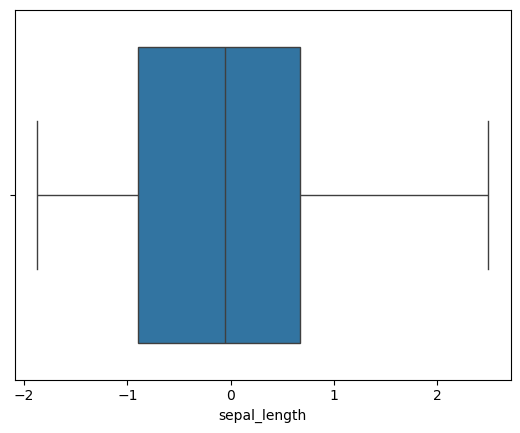

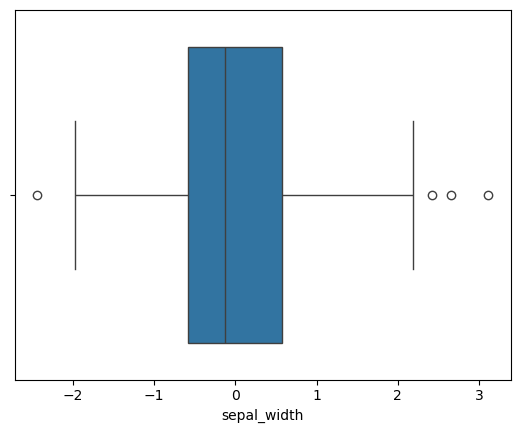

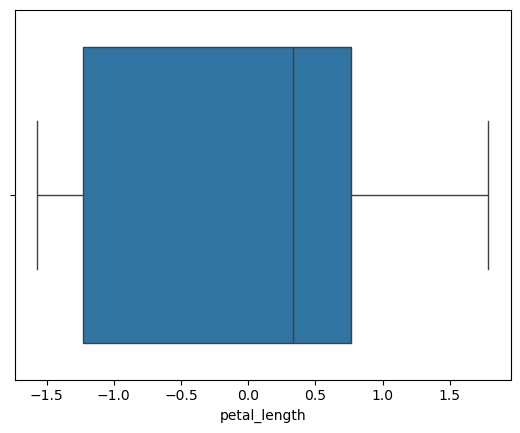

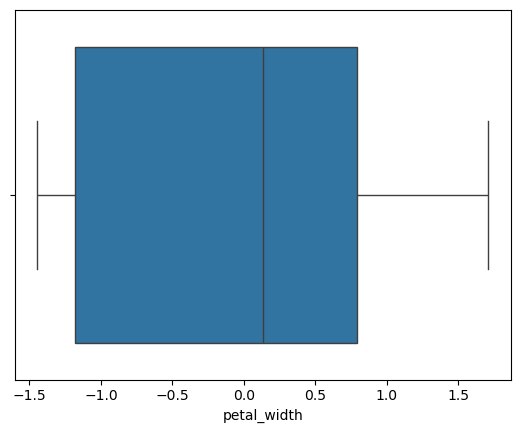

In [15]:

for column in df.columns[:-1]: 
    sns.boxplot(x=df[column])
    plt.show()


for column in df.columns[:-1]:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.clip(df[column], lower_bound, upper_bound)

# Data Visualization

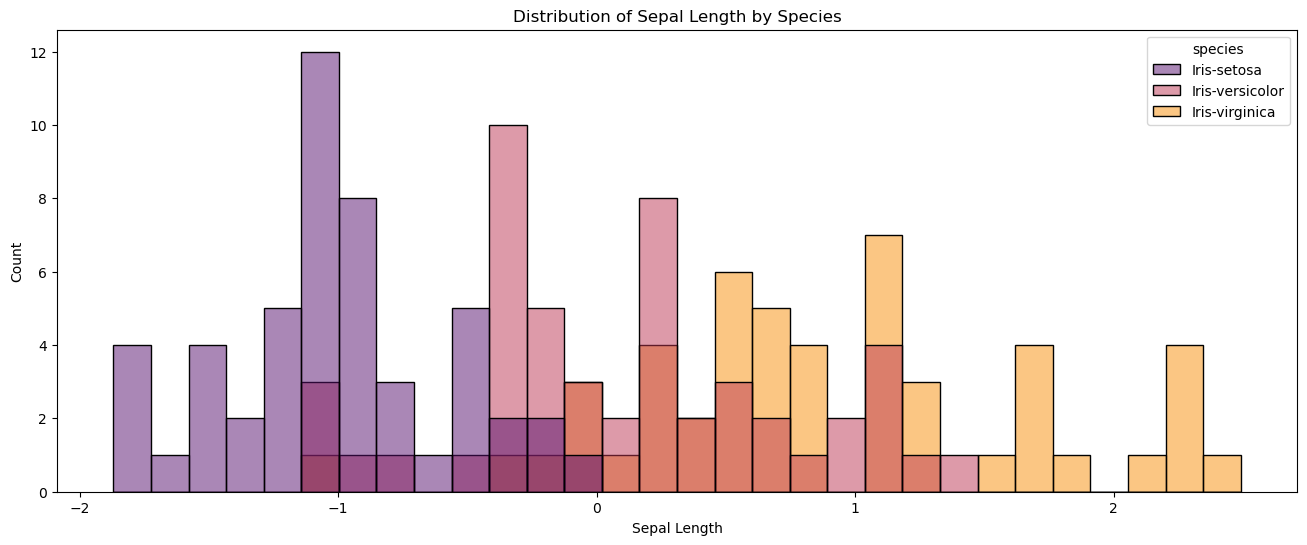

In [17]:
plt.figure(figsize=(16,6))
sns.histplot(df, x='sepal_length', hue='species', palette='inferno', kde=False, bins=30)

plt.title('Distribution of Sepal Length by Species')
plt.xlabel('Sepal Length')
plt.ylabel('Count')
plt.show()

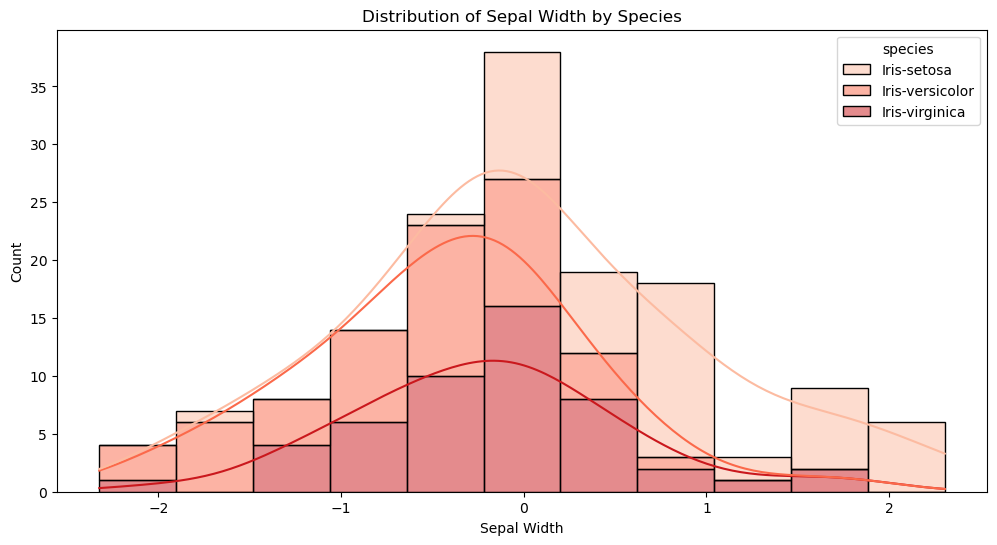

In [19]:
plt.figure(figsize=(12, 6))
sns.histplot(df, x='sepal_width', hue='species', palette='Reds', multiple="stack", kde=True)

plt.title('Distribution of Sepal Width by Species')
plt.xlabel('Sepal Width')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

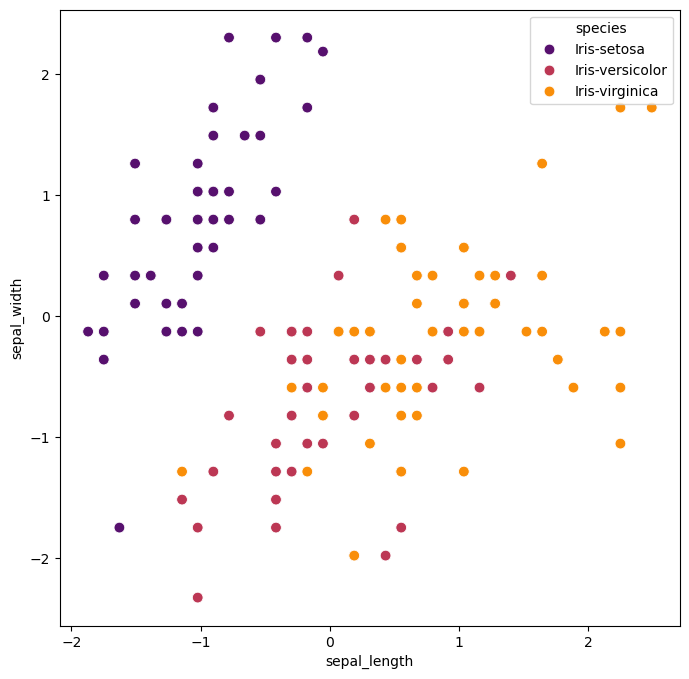

In [21]:
plt.figure(figsize =(8,8))
sns.scatterplot(x='sepal_length', y='sepal_width',data=df,hue ='species',palette = 'inferno' ,s=60)

<Axes: xlabel='petal_length', ylabel='petal_width'>

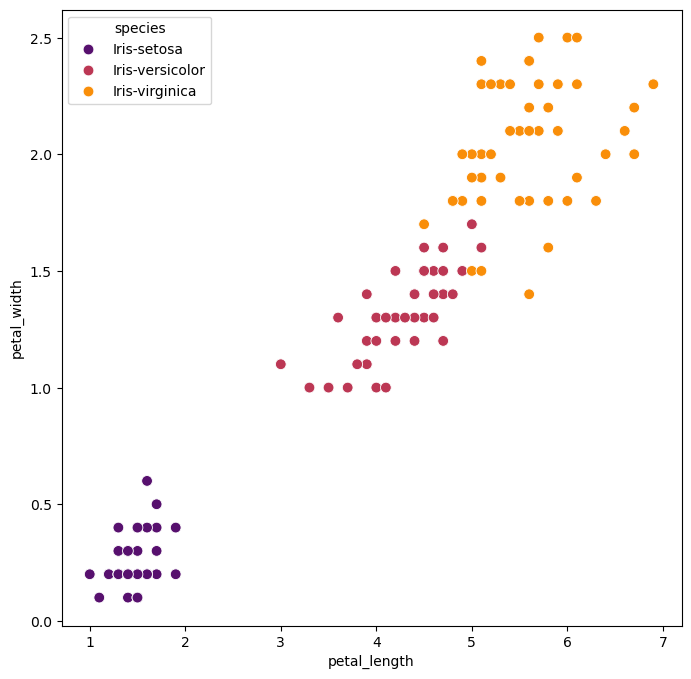

In [27]:
plt.figure(figsize =(8,8))
sns.scatterplot(x='petal_length', y='petal_width',data=df,hue ='species' ,palette = 'inferno'  ,s=60)

<Figure size 800x800 with 0 Axes>

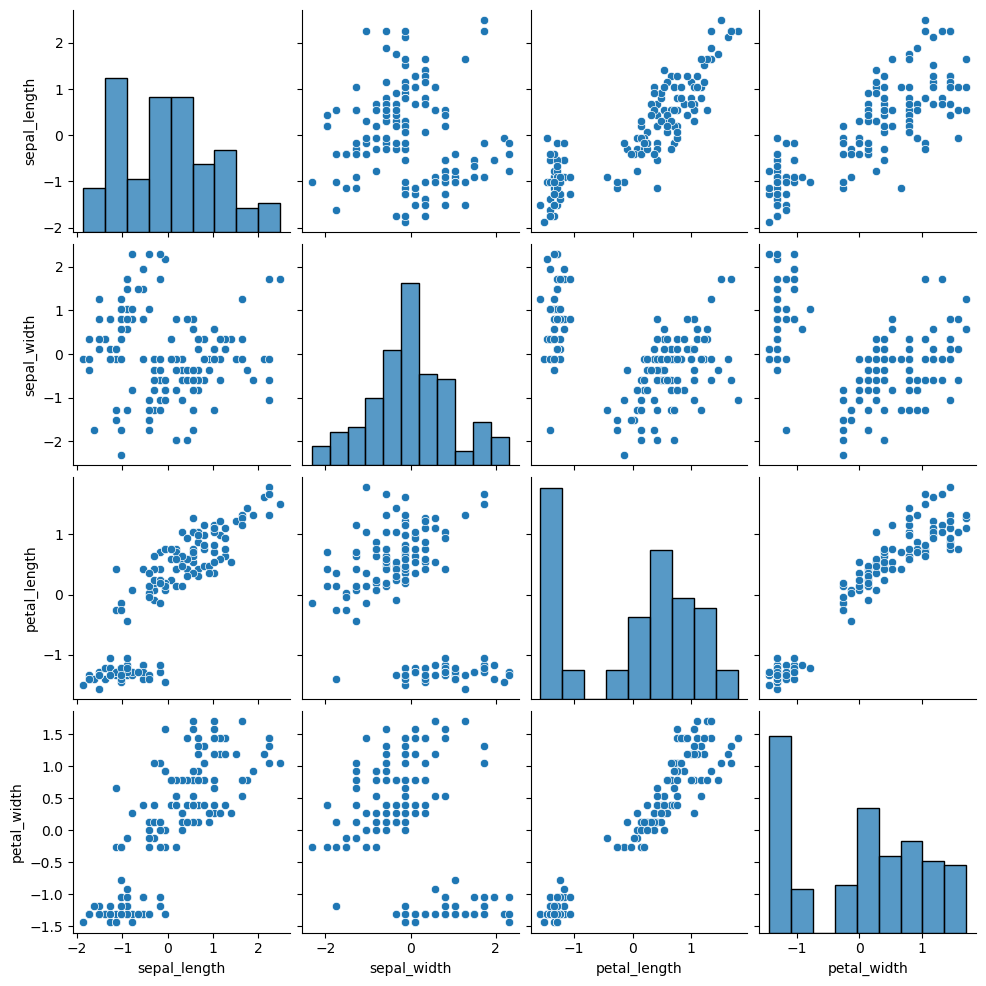

In [25]:
plt.figure(figsize = (8,8))
sns.pairplot(df)

 # Logistic Regression

# Model Bulding

In [44]:
x = df.drop(['species'],axis = 1)
y = df['species']

In [25]:

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3 ,random_state = 0)

# Model Initialization

In [27]:

lr = LogisticRegression()

# Model Training

In [29]:
lr.fit(x_train , y_train )
lr.score(x_train,y_train)

0.9809523809523809

#  Hyper parameter tunning

In [19]:

logistic_model = LogisticRegression(random_state=42, max_iter=100)

param_grid = [
    {'C': [0.1, 1, 10, 100], 'solver': ['liblinear'], 'penalty': ['l1', 'l2']},
    {'C': [0.1, 1, 10, 100], 'solver': ['lbfgs', 'newton-cg'], 'penalty': ['l2', 'none']},
    {'C': [0.1, 1, 10, 100], 'solver': ['saga'], 'penalty': ['elasticnet'], 'l1_ratio': [0.5, 0.7, 0.9]},
    {'C': [0.1, 1, 10, 100], 'solver': ['saga'], 'penalty': ['l1', 'l2']}
]

grid = GridSearchCV(logistic_model, param_grid, refit=True, cv=5, verbose=2)

grid.fit(x_train, y_train)


Fitting 5 folds for each of 44 candidates, totalling 220 fits
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..................C=1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..................C=1, penalty=l1, sol

C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END .................C=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=1

C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=0

C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...................C=10, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...................C=10, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...................

C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..................C=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..................C=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..................C=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..................C=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..................C

C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarn

[CV] END C=0.1, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.7, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.7, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.7, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.7, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.7, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.0s


C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarn

[CV] END C=0.1, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=1, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=1, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=1, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=1, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=1, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=1, l1_ratio=0.7, penalty=elasticnet, solver=saga; total time=   0.0s


C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarn

[CV] END .C=1, l1_ratio=0.7, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=1, l1_ratio=0.7, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=1, l1_ratio=0.7, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=1, l1_ratio=0.7, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=1, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=1, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=1, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=1, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.0s


C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarn

[CV] END .C=1, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=10, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=10, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=10, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=10, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=10, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=10, l1_ratio=0.7, penalty=elasticnet, solver=saga; total time=   0.0s


C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarn

[CV] END C=10, l1_ratio=0.7, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=10, l1_ratio=0.7, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=10, l1_ratio=0.7, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=10, l1_ratio=0.7, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=10, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=10, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=10, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.0s


C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarn

[CV] END C=10, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=10, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=100, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=100, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=100, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=100, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=100, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=100, l1_ratio=0.7, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=100, l1_ratio=0.7, penalty=elasticnet, solver=saga; total time=   0.0s


C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, l1_ratio=0.7, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=100, l1_ratio=0.7, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=100, l1_ratio=0.7, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=100, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=100, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=100, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=100, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=100, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .....................C=0.1, penalty=l1, solver=saga; total time=   0.0s
[CV] END .....................C=0.1, penalty=l1, solver=saga; total time=   0.0s
[CV] END .....................C=0.1, penalty=l1, solver=saga; total time=   0.0s
[CV] END .....................C=0.1, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...........

C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarn

[CV] END .....................C=0.1, penalty=l2, solver=saga; total time=   0.0s
[CV] END .....................C=0.1, penalty=l2, solver=saga; total time=   0.0s
[CV] END .....................C=0.1, penalty=l2, solver=saga; total time=   0.0s
[CV] END .....................C=0.1, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......................C=1, penalty=l1, solver=saga; total time=   0.0s
[CV] END .......................C=1, penalty=l1, solver=saga; total time=   0.0s
[CV] END .......................C=1, penalty=l1, solver=saga; total time=   0.0s
[CV] END .......................C=1, penalty=l1, solver=saga; total time=   0.0s
[CV] END .......................C=1, penalty=l1, solver=saga; total time=   0.0s


C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarn

[CV] END .......................C=1, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......................C=1, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......................C=1, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......................C=1, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......................C=1, penalty=l2, solver=saga; total time=   0.0s


C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarn

[CV] END ......................C=10, penalty=l1, solver=saga; total time=   0.0s
[CV] END ......................C=10, penalty=l1, solver=saga; total time=   0.0s
[CV] END ......................C=10, penalty=l1, solver=saga; total time=   0.0s
[CV] END ......................C=10, penalty=l1, solver=saga; total time=   0.0s
[CV] END ......................C=10, penalty=l1, solver=saga; total time=   0.0s
[CV] END ......................C=10, penalty=l2, solver=saga; total time=   0.0s
[CV] END ......................C=10, penalty=l2, solver=saga; total time=   0.0s
[CV] END ......................C=10, penalty=l2, solver=saga; total time=   0.0s


C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarn

[CV] END ......................C=10, penalty=l2, solver=saga; total time=   0.0s
[CV] END ......................C=10, penalty=l2, solver=saga; total time=   0.0s
[CV] END .....................C=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END .....................C=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END .....................C=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END .....................C=100, penalty=l1, solver=saga; total time=   0.0s


C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ARUN RAJ\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarn

[CV] END .....................C=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END .....................C=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END .....................C=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END .....................C=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END .....................C=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END .....................C=100, penalty=l2, solver=saga; total time=   0.0s


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid=[{'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                          'solver': ['liblinear']},
                         {'C': [0.1, 1, 10, 100], 'penalty': ['l2', 'none'],
                          'solver': ['lbfgs', 'newton-cg']},
                         {'C': [0.1, 1, 10, 100], 'l1_ratio': [0.5, 0.7, 0.9],
                          'penalty': ['elasticnet'], 'solver': ['saga']},
                         {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                          'solver': ['saga']}],
             verbose=2)

In [20]:


print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)

best_logistic_model = grid.best_estimator_

Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best Accuracy: 0.980952380952381


# Evaluation and Result

In [35]:
predictions = lr.predict(x_test)
predictions

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [37]:
y_test

114     Iris-virginica
62     Iris-versicolor
33         Iris-setosa
107     Iris-virginica
7          Iris-setosa
100     Iris-virginica
40         Iris-setosa
86     Iris-versicolor
76     Iris-versicolor
71     Iris-versicolor
134     Iris-virginica
51     Iris-versicolor
73     Iris-versicolor
54     Iris-versicolor
63     Iris-versicolor
37         Iris-setosa
78     Iris-versicolor
90     Iris-versicolor
45         Iris-setosa
16         Iris-setosa
121     Iris-virginica
66     Iris-versicolor
24         Iris-setosa
8          Iris-setosa
126     Iris-virginica
22         Iris-setosa
44         Iris-setosa
97     Iris-versicolor
93     Iris-versicolor
26         Iris-setosa
137     Iris-virginica
84     Iris-versicolor
27         Iris-setosa
127     Iris-virginica
132     Iris-virginica
59     Iris-versicolor
18         Iris-setosa
83     Iris-versicolor
61     Iris-versicolor
92     Iris-versicolor
112     Iris-virginica
2          Iris-setosa
141     Iris-virginica
43         

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.9777777777777777

### Errors

### Research